In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2,os,binascii,struct
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from PIL import Image
import scipy,scipy.misc,scipy.cluster

In [11]:
def get_color(img):
    global peak,peak_min
    NUM_CLUSTERS = 5
    im = Image.open(img)
    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
    index_max = scipy.argmax(counts)# find most frequent
    index_min=scipy.argmin(counts) # find min frequent
    peak_max = codes[index_max]
    peak_min=codes[index_min]
    colour = binascii.hexlify(bytearray(int(c) for c in peak_max)).decode('ascii')
    return peak_max,peak_min

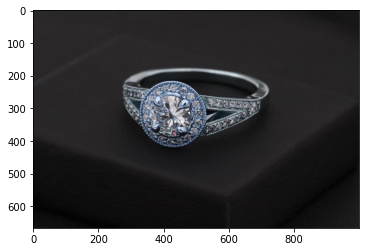

In [22]:
img=cv2.imread('C:\\Users\\sj\\Desktop\\rings_dataset\\New folder\\photo.jpg')
plt.imshow(img)

In [15]:
res=get_color('C:\\Users\\sj\\Desktop\\rings_dataset\\New folder\\photo.jpg')
print(res[0],res[1]) # 0 is for most frequent  and 1 is for less frrequent

C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead
  import sys


[40.11073271 38.46796989 40.61309126] [185.45728282 173.49548335 166.01851602]


C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sj\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.argmin is deprecated and will be removed in SciPy 2.0.0, use numpy.argmin instead
  if sys.path[0] == '':
